# We Rate Dogs — Wrangle Act
09/10/2018

Mayra Dantas Bueno

# Tarefas

1.    Acessar e juntar em um só arquivo 3 fontes de dados distintas (conforme o projeto orienta, um dos acesso é via web, usando diretamente a API do Twitter)
2.    Identificar e documentar os pontos de correção nos dados dessa fonte final
3.    Fazer uma cópia da fonte final e aplicar as correções
4.    Na base copiada e corrigida, fazer insights sobre os dados
5.    Salvar a base copiada e corrigida ou em csv ou sql
6.    Fazer dois relatórios, um sobre o trabalho realizado e outro sobre os insights descobertos

### Quality

1. Nomes das raças começando com letras maíusculas e minúsculas
2. Dados confusos em dataframes diferentes
3. Linhas sem imagens (devido à junção dos três dataframes)
4. Necessidade de juntar três arquivos diferentes (dados soltos em arquivos distintos)
5. Muitos valores NaN e None (nulo representado como None em algumas colunas e NaN em outras)
6. Falta de valor padrão mais legível para valores nulos
7. "A", "an", "the" e similares na coluna de nome
8. Cães classificados nas colunas Doggo, Pupper, Puppo e Floofer são indicados com o próprio nome da coluna

### Tidiness

1. Numerador e denominador das notas em colunas separadas
2. Nomes das colunas não são claros

# Gather

In [3]:
import pandas as pd
import numpy as np
import requests
import tweepy
import simplejson as json
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

Não incluir keys no envio do projeto

In [50]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [28]:
for tweet in tweepy.Cursor(api.search, q='github',tweet_mode='extended').items(5):
    # Defining Tweets Creators Name
    tweettext = str( tweet.full_text.lower().encode('ascii',errors='ignore')) #encoding to get rid of characters that may not be able to be displayed
    # Defining Tweets Id
    tweetid = tweet.id

Acessar arquivo 'image-predictions.tsv' -- Baixar arquivos e criar dataframes

In [4]:
imagens_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [30]:
imagens_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
imagens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Acessar arquivo 'twitter-archive-enhanced.csv' -- Baixar arquivos e criar dataframes

In [5]:
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

In [79]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [67]:
twitter_df['rating_numerator'].mean()

13.12648556876061

In [68]:
twitter_df['rating_denominator'].mean()

10.455432937181664

In [80]:
twitter_df.loc[twitter_df['rating_denominator'].idxmax()]

tweet_id                                                     731156023742988288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-05-13 16:15:54 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Say hello to this unbelievably well behaved sq...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/731156023...
rating_numerator                                                            204
rating_denominator                                                          170
name                                    

In [7]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Define

Criar novo dataframe com colunas relevantes que serão unidas posteriormente

## Code

In [6]:
new_doggo_df = twitter_df[["tweet_id", "rating_numerator", "rating_denominator", "name", "doggo", "floofer", "pupper", "puppo"]].copy()

## Test

In [76]:
new_doggo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2356 non-null int64
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(5)
memory usage: 147.3+ KB


Criar dataframe a partir da API do Twitter -- Baixar dados dos tweets

In [32]:
tweet_ids = list(twitter_df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968


Rate limit reached. Sleeping for: 659


Error for: 754011816964026368


Rate limit reached. Sleeping for: 648


Salvar os tweets em arquivos para consulta

In [33]:
with open('tweet_json.json', 'w', encoding="utf-8") as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [34]:
with open('tweet_json.csv', 'w', encoding="utf-8") as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [36]:
import json

with open('tweet_json.txt', 'w', encoding="utf-8") as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

Importar arquivo salvo como dataframe

In [7]:
tweet_df = pd.read_json('tweet_json.json',orient='index')

# Clean & Merge

In [44]:
tweet_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2552,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,128,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,297,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,140,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


## Define

Criar novo data frame com colunas relevantes escolhidas

## Code

In [8]:
new_tweet_df = tweet_df[["id", "retweet_count", "favorite_count", "text"]].copy()

## Test

In [47]:
new_tweet_df.head()

,id,retweet_count,favorite_count,text
1991-02-08 13:48:08.022790149,666020888022790144,508,2552,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,666029285002620928,47,128,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,666033412701032448,44,125,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,666044226329800704,140,297,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,666049248165822464,40,109,Here we have a 1949 1st generation vulpix. Enj...


## Define

Usar merge para unir os dataframes ('image-predictions.tsv') imagens_df com o que acabou de ser criado ('tweet_json.json' -- baixado pela API do twitter)

## Code

In [9]:
tweet_images_df = pd.merge(new_tweet_df, imagens_df, 
                           left_on='id', right_on='tweet_id', 
                           how='right').drop('id', axis=1)

## Test

In [78]:
tweet_images_df.head()

,retweet_count,favorite_count,text,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,47.0,128.0,This is a western brown Mitsubishi terrier. Up...,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
1,140.0,297.0,This is a purebred Piers Morgan. Loves to Netf...,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2,843.0,1210.0,This is an odd dog. Hard on the outside but lo...,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
3,141.0,294.0,My oh my. This is a rare blond Canadian terrie...,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
4,57.0,111.0,Here is the Rand Paul of retrievers folks! He'...,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [79]:
tweet_images_df.tail()

,retweet_count,favorite_count,text,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,NaN,NaN,NaN,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2071,NaN,NaN,NaN,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2072,NaN,NaN,NaN,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2073,NaN,NaN,NaN,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,NaN,NaN,NaN,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


## Define

Renomear tweet_id por id

## Code

In [10]:
tweet_images_df.rename(columns={'tweet_id': 'id'}, inplace=True)

## Define

Usar merge para unir dataframe criado anteriormente (image-predictions.tsv + tweet_json.json) e 'new_doggo_df' (twitter-archive-enhanced.csv)

## Code

In [11]:
final_df = pd.merge(tweet_images_df, new_doggo_df,
                            left_on='id', right_on='tweet_id', 
                            how='right').drop('tweet_id', axis=1)

## Define

Deletar linhas que não tenham url de jpg para não incluir tweets sem imagens

## Code

In [12]:
final_df = final_df.dropna(subset=['jpg_url'])

## Define

Substituir valores para padronizar e melhorar leitura dos dados

## Code

In [13]:
final_df.is_copy = False
final_df.retweet_count.fillna(0, inplace=True)
final_df.favorite_count.fillna(0, inplace=True)
final_df.text.fillna('No text', inplace=True)

In [14]:
dog_list = ['a', 'an', 'the']

for j in dog_list:
    if len(j) < 4:
        final_df.name.replace(j, 'Dog', inplace=True)
        
final_df['name'] = final_df['name'].str.replace('None', 'Dog')

In [15]:
final_df['doggo'] = final_df['doggo'].str.replace('None', 'False')
final_df['pupper'] = final_df['pupper'].str.replace('None', 'False')
final_df['floofer'] = final_df['floofer'].str.replace('None', 'False')
final_df['puppo'] = final_df['puppo'].str.replace('None', 'False')

final_df['doggo'] = final_df['doggo'].str.replace('doggo', 'True')
final_df['pupper'] = final_df['pupper'].str.replace('pupper', 'True')
final_df['floofer'] = final_df['floofer'].str.replace('floofer', 'True')
final_df['puppo'] = final_df['puppo'].str.replace('puppo', 'True')

#Doggo
final_df['doggo'] = final_df['doggo'].str.replace('pupper', 'False')
final_df['doggo'] = final_df['doggo'].str.replace('floofer', 'False')
final_df['doggo'] = final_df['doggo'].str.replace('puppo', 'False')

#Pupper
final_df['pupper'] = final_df['pupper'].str.replace('doggo', 'True')
final_df['pupper'] = final_df['pupper'].str.replace('floofer', 'True')
final_df['pupper'] = final_df['pupper'].str.replace('puppo', 'True')

#Fluffer
final_df['floofer'] = final_df['floofer'].str.replace('doggo', 'True')
final_df['floofer'] = final_df['floofer'].str.replace('pupper', 'True')
final_df['floofer'] = final_df['floofer'].str.replace('puppo', 'True')

#Puppo
final_df['puppo'] = final_df['puppo'].str.replace('doggo', 'True')
final_df['puppo'] = final_df['puppo'].str.replace('pupper', 'True')
final_df['puppo'] = final_df['puppo'].str.replace('floofer', 'True')

## Define

Mudar nome das colunas

## Code

In [16]:
final_df = final_df.rename(columns={'retweet_count': 'Retweets',
                                    'favorite_count': 'Favorites',
                                    'text': 'Text',
                                    'id': 'Id',
                                    'jpg_url': 'Jpg url',
                                    'img_num': 'Image num',
                                    'p1': 'Prediction 1',
                                    'p1_conf': 'Reliability 1',
                                    'p1_dog': 'Breed 1',
                                    'p2': 'Prediction 2',
                                    'p2_conf': 'Reliability 2',
                                    'p2_dog': 'Breed 2',
                                    'p3': 'Prediction 3',
                                    'p3_conf': 'Reliability 3',
                                    'p3_dog': 'Breed 3',
                                    'name': 'Name',
                                    'doggo': 'Doggo',
                                    'floofer': 'Floofer',
                                    'pupper': 'Pupper',
                                    'puppo': 'Puppo'})        

## Define

Concaternar os valores de 'rating_numerator' e 'rating_denominator'

## Code

In [17]:
final_df['Rating'] = final_df['rating_numerator'].map(str)+'/'+final_df['rating_denominator'].map(str)

## Define

Deletar colunas 'rating_numerator' e 'rating_denominator'

## Code

In [18]:
final_df = final_df.drop(['rating_numerator', 'rating_denominator'], axis=1)

## Define

Capitalizar a primeira letra dos nomes de raças em previsões

## Code

In [19]:
final_df['Prediction 1'] = final_df['Prediction 1'].str.title()
final_df['Prediction 2'] = final_df['Prediction 2'].str.title()
final_df['Prediction 3'] = final_df['Prediction 3'].str.title()

# Tests

In [42]:
final_df.head()

,Retweets,Favorites,Text,Id,Jpg url,Image num,Prediction 1,Reliability 1,Breed 1,Prediction 2,...,Breed 2,Prediction 3,Reliability 3,Breed 3,Name,Doggo,Floofer,Pupper,Puppo,Rating
0,47.0,128.0,This is a western brown Mitsubishi terrier. Up...,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,Redbone,0.506826,True,Miniature_Pinscher,...,True,Rhodesian_Ridgeback,0.072010,True,Dog,False,False,False,False,7/10
1,140.0,297.0,This is a purebred Piers Morgan. Loves to Netf...,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_Ridgeback,0.408143,True,Redbone,...,True,Miniature_Pinscher,0.222752,True,Dog,False,False,False,False,6/10
2,843.0,1210.0,This is an odd dog. Hard on the outside but lo...,6.660519e+17,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1.0,Box_Turtle,0.933012,False,Mud_Turtle,...,False,Terrapin,0.017885,False,Dog,False,False,False,False,2/10
3,141.0,294.0,My oh my. This is a rare blond Canadian terrie...,6.660571e+17,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1.0,Shopping_Cart,0.962465,False,Shopping_Basket,...,False,Golden_Retriever,0.007959,True,Dog,False,False,False,False,9/10
4,57.0,111.0,Here is the Rand Paul of retrievers folks! He'...,6.660586e+17,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1.0,Miniature_Poodle,0.201493,True,Komondor,...,True,Soft-Coated_Wheaten_Terrier,0.082086,True,Dog,False,False,False,False,8/10


In [44]:
final_df.tail()

,Retweets,Favorites,Text,Id,Jpg url,Image num,Prediction 1,Reliability 1,Breed 1,Prediction 2,...,Breed 2,Prediction 3,Reliability 3,Breed 3,Name,Doggo,Floofer,Pupper,Puppo,Rating
2070,0.0,0.0,No text,8.898809e+17,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1.0,French_Bulldog,0.377417,True,Labrador_Retriever,...,True,Muzzle,0.082981,False,Bruno,False,False,False,False,13/10
2071,0.0,0.0,No text,8.902403e+17,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True,Cardigan,...,True,Chihuahua,0.029248,True,Cassie,True,False,False,False,14/10
2072,0.0,0.0,No text,8.909719e+17,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,Border_Collie,...,True,Ice_Lolly,0.193548,False,Jax,False,False,False,False,13/10
2073,0.0,0.0,No text,8.921774e+17,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,...,True,Papillon,0.068957,True,Tilly,False,False,False,False,13/10
2074,0.0,0.0,No text,8.924206e+17,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,...,False,Banana,0.076110,False,Phineas,False,False,False,False,13/10


In [43]:
print(final_df)

      Retweets  Favorites                                               Text  \
0         47.0      128.0  This is a western brown Mitsubishi terrier. Up...   
1        140.0      297.0  This is a purebred Piers Morgan. Loves to Netf...   
2        843.0     1210.0  This is an odd dog. Hard on the outside but lo...   
3        141.0      294.0  My oh my. This is a rare blond Canadian terrie...   
4         57.0      111.0  Here is the Rand Paul of retrievers folks! He'...   
5         60.0      145.0  Here we have a northern speckled Rhododendron....   
6        163.0      319.0  Let's hope this flight isn't Malaysian (lol). ...   
7         67.0      153.0  Can stand on stump for what seems like a while...   
8         12.0       80.0  Oh my. Here you are seeing an Adobe Setter giv...   
9       6522.0    14217.0  Not familiar with this breed. No tail (weird)....   
10        35.0      102.0  Very concerned about fellow dog trapped in com...   
11        76.0      174.0     Can take s

# Save

Salvar arquivo em csv -- Backup do arquivo limpo

In [20]:
final_df.to_csv("final_df.csv", sep=',', encoding='utf-8')

# Assess

In [49]:
final_df['Prediction 1'].value_counts()

Golden_Retriever             150
Labrador_Retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy_Poodle                    39
Pomeranian                    38
Malamute                      30
Cocker_Spaniel                30
French_Bulldog                26
Miniature_Pinscher            23
Chesapeake_Bay_Retriever      23
Seat_Belt                     22
German_Shepherd               20
Staffordshire_Bullterrier     20
Siberian_Husky                20
Cardigan                      19
Web_Site                      19
Shetland_Sheepdog             18
Maltese_Dog                   18
Eskimo_Dog                    18
Teddy                         18
Beagle                        18
Shih-Tzu                      17
Lakeland_Terrier              17
Rottweiler                    17
Italian_Greyhound             16
Kuvasz                        16
          

In [60]:
final_df.Text.str.count('No text').sum()

730

In [63]:
final_df.Puppo.str.count('True').sum()

24

In [64]:
final_df.Doggo.str.count('True').sum()

80

In [65]:
final_df.Floofer.str.count('True').sum()

8

In [66]:
final_df.Pupper.str.count('True').sum()

222

In [72]:
final_df.loc[final_df['Favorites'].idxmax()]

Retweets                                                     60096
Favorites                                                   121495
Text             This is Stephan. He just wants to help. 13/10 ...
Id                                                     8.07107e+17
Jpg url          https://pbs.twimg.com/ext_tw_video_thumb/80710...
Image num                                                        1
Prediction 1                                             Chihuahua
Reliability 1                                              0.50537
Breed 1                                                       True
Prediction 2                                            Pomeranian
Reliability 2                                             0.120358
Breed 2                                                       True
Prediction 3                                           Toy_Terrier
Reliability 3                                            0.0770081
Breed 3                                                       

In [94]:
final_df.loc[final_df['Reliability 1'].idxmin()]

Retweets                                                        83
Favorites                                                      233
Text             This is Jimothy. He is a Botwanian Gouda. Can ...
Id                                                     6.66645e+17
Jpg url            https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg
Image num                                                        1
Prediction 1                                          Ibizan_Hound
Reliability 1                                            0.0443334
Breed 1                                                       True
Prediction 2                                              Pembroke
Reliability 2                                            0.0432093
Breed 2                                                       True
Prediction 3                           West_Highland_White_Terrier
Reliability 3                                            0.0389056
Breed 3                                                       

In [21]:
final_df.groupby('Prediction 1')['Retweets'].sum().sort_values(ascending=False)

Prediction 1
Golden_Retriever            371776.0
Labrador_Retriever          231875.0
Pembroke                    191911.0
Chihuahua                   169214.0
Standard_Poodle              84514.0
Samoyed                      79966.0
Cardigan                     78251.0
Pug                          75485.0
French_Bulldog               67983.0
Cocker_Spaniel               67312.0
Pomeranian                   64308.0
Chow                         63134.0
Chesapeake_Bay_Retriever     52453.0
Swing                        49380.0
Seat_Belt                    48428.0
Malamute                     48122.0
Toy_Poodle                   43100.0
Upright                      36340.0
Flat-Coated_Retriever        34570.0
Hippopotamus                 34109.0
Bubble                       33360.0
Gondola                      31922.0
Angora                       31416.0
Home_Theater                 29935.0
Rottweiler                   29761.0
Norwegian_Elkhound           29699.0
Web_Site                 

# Visualization

Somar os retweets e as a previsão 1 das 10 raças mais populares

In [51]:
popular_breeds = final_df.groupby('Prediction 1')['Retweets'].sum().sort_values(ascending=False)
popular_breeds10 = popular_breeds[:10]

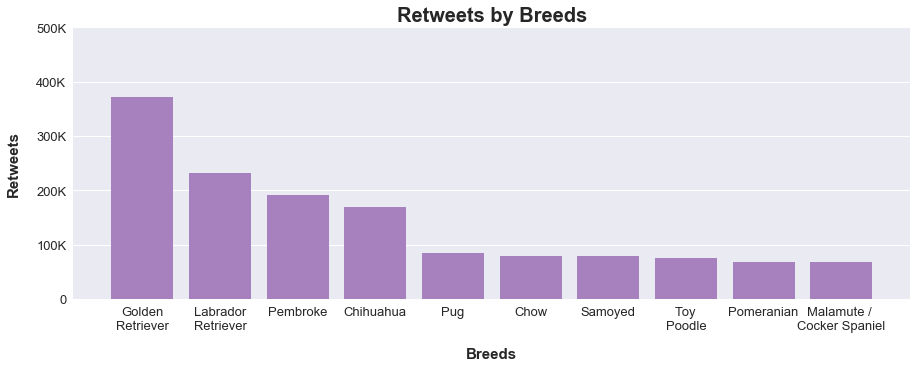

In [56]:
number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
breeds = ['Golden\nRetriever', 'Labrador\nRetriever', 'Pembroke', 'Chihuahua', 
          'Pug', 'Chow', 'Samoyed', 'Toy\nPoodle', 'Pomeranian', 'Malamute / \nCocker Spaniel']
yticks_old = [0, 100000, 200000, 300000, 400000, 500000]
yticks_new = ['0','100K','200K','300K','400K', '500K']
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(number, popular_breeds10, color="#a781bd", width = 0.8)
plt.title('Retweets by Breeds', fontsize=20, fontweight='bold')
plt.xlabel('Breeds', fontsize=15, labelpad=15, fontweight='bold')
plt.ylabel('Retweets', fontsize=15, labelpad=15, fontweight='bold')
plt.xticks(number, breeds, fontsize=13)
plt.yticks(yticks_old, yticks_new, fontsize=13)
ax.xaxis.grid(False)
plt.show()
fig.savefig('RetweetNumberByBreeds.png', dpi=fig.dpi)

# Insigths

- As fotos previstos pela inteligência artificial como sendo de Golden Retrievers foram mais retuitadas.
- A inteligênica artificial previu mais Golden Retrievers do que qualquer outra raça.
- Tweets sem texto são menos favoritados e retuitados
- Puppers (filhotes) são, aparentemente, mais classificados

Mais detalhes em: act_report.html e wrangle_report.html